# Team 6a - Phase 2 - Project Proposal

## Title : 

US and Japan YouTube Trending Videos

## Problem: 
    
Our goal is to analyze US and Japan YouTube trending videos and identify preferences in video categories, channels, publishing and trending time and viewer interactions. We will analyze the characteristics including categories, view, likes count and trending time (season/weekday/month), in trending videos to identify and compare changes in preference over time. Moreover, we are interested to know if the country culture has an influence on the YouTube trending videos characteristics.

## Data source:

Initially, we had four different tables with the videos information and two tables that contain the video categories information. 


`ba775-team-6a.youtube.US_youtube_trending_data`,
`ba775-team-6a.youtube.US_youtube_trending_data_past`,
`ba775-team-6a.youtube.JP_youtube_trending_data`,
`ba775-team-6a.youtube.JP_youtube_trending_data_past`,
`ba775-team-6a.youtube.US_video_categories`,
`ba775-team-6a.youtube.JP_video_categories`

We decided to put all the information in one table which is the one that we will use in our analysis:

`ba775-team-6a.youtube.Youtube_trending_videos`

Also, we are using YouTube API to gather more video characteristics such as channel statistics, comments and playlists:

https://developers.google.com/youtube/v3/docs

## Reference to datasource:

This datasources were collected using the Youtube API and it presents a list of the top trending videos on the platform. To determine the year's top-trending videos, Youtube uses a combination of factors such as number of views, shares, comments and likes. We accessed the datasources via Kaggle data notebooks  "Trending Yotube Video Statistics" and "YouTube Trending Video Dataset".

YouTube API's documentation:
https://developers.google.com/youtube/v3/docs

Links: 

https://www.kaggle.com/datasnaek/youtube-new

https://www.kaggle.com/rsrishav/youtube-trending-video-dataset

## Outline
1. Analysis of Youtube Categories

2. Analysis of Youtube Channels

3. Correlation between Categories and Categories

4. Analysis of Youtube Videos

5. Correlation between Catogories and Top Videos

6. User Interaction and Behavior

##1. Analysis of Youtube Categories

> Youtube videos are already groupped into several categories, such as musics, entertainment, etc. In this part, we will use the Youtube data in 2020, pull out the top 10 most popular categores, and analyze basic statistics, including views, videos, likes, dislikes, and trending time. We will also go deeper into the similarities and differences of watching preference from people in both countries, Japan and the US.



### Preparation for Analysis

> Before analyzing categories, let's load the csv file and transform the raw data into a more readable one!

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
data1=pd.read_csv('YouTube_trending_videos.csv')
data2=data1[['trending_date','Country', 'Category_name', 'title', 'view_count', 'likes', 'dislikes']]
data2['year']= pd.DatetimeIndex(data2['trending_date']).year
pre_data=data2.loc[(data2["year"] == 2020)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


> Now, the new dataset only includes records only from 2020.



In [99]:
pre_data.head()

,trending_date,Country,Category_name,title,view_count,likes,dislikes,year
10,2020-08-30 00:00:00 UTC,Japan,Music,Tak Matsumoto “Bluesman” YouTube Live,288320,12343,60,2020
11,2020-09-02 00:00:00 UTC,Japan,Music,Tak Matsumoto “Bluesman” YouTube Live,363584,13159,72,2020
12,2020-08-31 00:00:00 UTC,Japan,Music,Tak Matsumoto “Bluesman” YouTube Live,324387,12777,64,2020
13,2020-09-03 00:00:00 UTC,Japan,Music,Tak Matsumoto “Bluesman” YouTube Live,375254,13249,75,2020
14,2020-09-04 00:00:00 UTC,Japan,Music,Tak Matsumoto “Bluesman” YouTube Live,382518,13304,79,2020


### Top 10 categories in 2020 for the US and Japan

> Categories reflects watching preference. By extracting top 10 categories, we could find which types of videos viewers prefer to watch.

> To create an ideal data for visualization, create a dataset of top 10 categories from each country.


Top 10 in Japan:

In [100]:
data6=pre_data.loc[(data2["Country"] == "Japan")]
top_jp_2020=data6[['Category_name', 'view_count', 'likes', 'dislikes']].groupby('Category_name').sum().sort_values(by='view_count', ascending=False)[0:10].reset_index(level='Category_name')
top_jp_2020['Country']='Japan'
top_jp_2020

,Category_name,view_count,likes,dislikes,Country
0,Music,10390685184,830284812,22911272,Japan
1,Entertainment,4011742465,137782185,5155051,Japan
2,People & Blogs,1098249709,33532873,1072044,Japan
3,Comedy,1072481774,62957859,821108,Japan
4,Gaming,864214032,24601826,695949,Japan
5,Science & Technology,551903730,14461024,941125,Japan
6,Film & Animation,500705920,10154969,169475,Japan
7,Sports,431221051,5367931,217964,Japan
8,Howto & Style,356542189,9010844,364865,Japan
9,Autos & Vehicles,225314581,13239850,154176,Japan


Top 10 in the US:

In [101]:
data4=pre_data.loc[(data2["Country"] == "United States")]
top_us_2020=data4[['Category_name', 'view_count', 'likes', 'dislikes']].groupby('Category_name').sum().sort_values(by='view_count', ascending=False)[0:10].reset_index(level='Category_name')
top_us_2020['Country']='United States'
top_us_2020

,Category_name,view_count,likes,dislikes,Country
0,Music,15184206655,1108613505,31615188,United States
1,Entertainment,5997855145,384206651,7715464,United States
2,Gaming,3398117165,168307253,4638537,United States
3,Sports,2357745162,53348919,1867254,United States
4,People & Blogs,2326373242,152216157,4737424,United States
5,Science & Technology,1141368550,44403004,1423475,United States
6,Comedy,1111570479,98953571,1135647,United States
7,Film & Animation,906753925,47011743,982133,United States
8,Howto & Style,687549514,43021861,1273706,United States
9,News & Politics,553992951,8467804,1335936,United States


Next, combine two dataset into one to make data ready for visualization.

In [102]:
merged_data_2=top_jp_2020.append(top_us_2020)
merged_data_2

,Category_name,view_count,likes,dislikes,Country
0,Music,10390685184,830284812,22911272,Japan
1,Entertainment,4011742465,137782185,5155051,Japan
2,People & Blogs,1098249709,33532873,1072044,Japan
3,Comedy,1072481774,62957859,821108,Japan
4,Gaming,864214032,24601826,695949,Japan
5,Science & Technology,551903730,14461024,941125,Japan
6,Film & Animation,500705920,10154969,169475,Japan
7,Sports,431221051,5367931,217964,Japan
8,Howto & Style,356542189,9010844,364865,Japan
9,Autos & Vehicles,225314581,13239850,154176,Japan


It's time to start our analysis!

The first Analysis discover whether the top 10 categories are same or different in two countries. According to the plot below, since most categories appear in lists of top categories from both countries, watching preference are overall similar in the US and Japan.

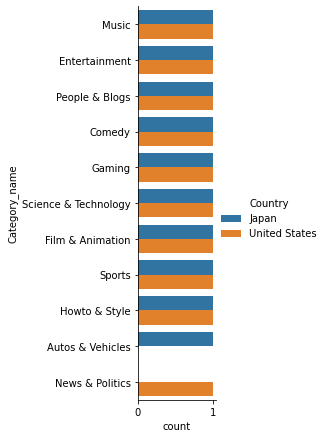

In [103]:
sns.catplot(y="Category_name", kind="count", hue='Country', data=merged_data_2, height=6, aspect=0.6);

After taking a glance of shared categories, let's take a look at total views, likes, and dislikes!

Total View by Categories:

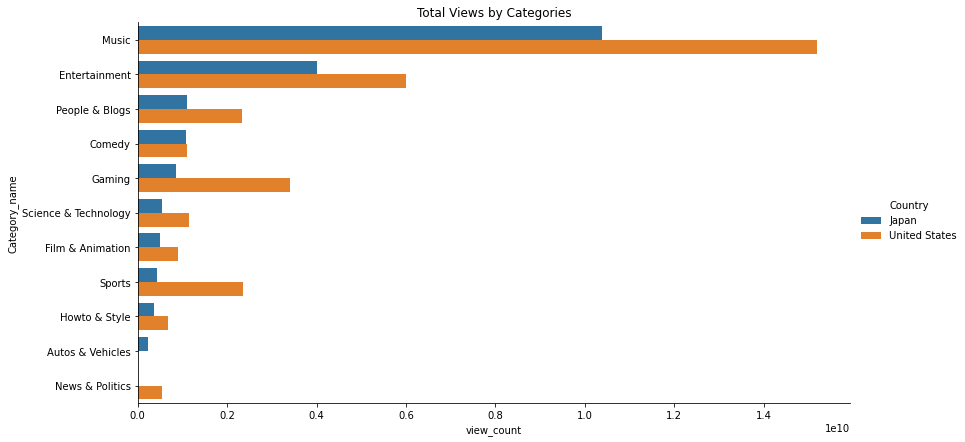

In [147]:
sns.catplot(x="view_count", y="Category_name", hue="Country", kind="bar", data=merged_data_2, height=6, aspect=2)
plt.title('Total Views by Categories');


Total Likes by Categories:

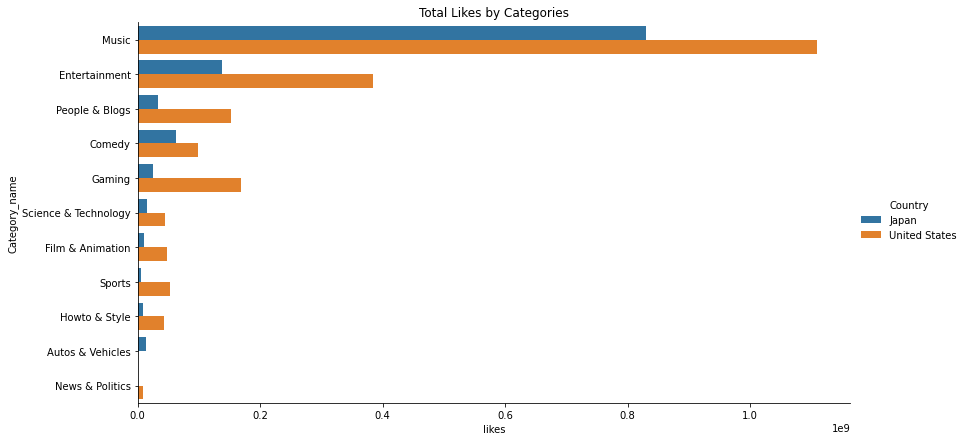

In [148]:
sns.catplot(x="likes", y="Category_name", hue="Country", kind="bar", data=merged_data_2, height=6, aspect=2)
plt.title('Total Likes by Categories');
#view_count_plot.set_xticklabels(rotation=40)

Total Dislikes by Categories:

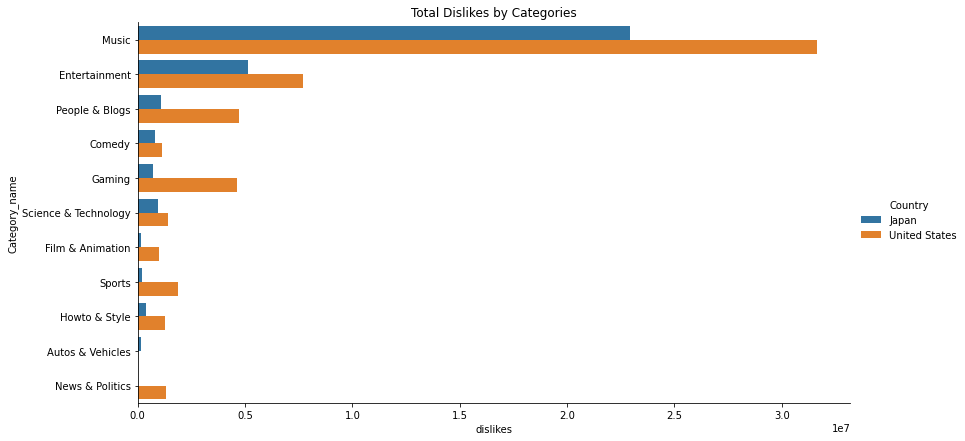

In [149]:
view_count_plot=sns.catplot(x="dislikes", y="Category_name", hue="Country", kind="bar", data=merged_data_2, height=6, aspect=2)
plt.title('Total Dislikes by Categories');
#view_count_plot.set_xticklabels(rotation=40)

Obviously, music and entertain top the lists of total views, like, and dislikes. This represent these two categories are the viewers' favorite.

## 4. Analysis of YouTube Videos

> After analyzing Youtube videos in a "macro" aspect, we could start focusing on the "micro" side. For this section, we will grab videos with top 10 view counts, analyze its statistics, and monitor how long does a video take to go trending.



### Top 10 videos  in 2020 for US and Japan

> 



> To create an ideal data for visualization, create a dataset of top 10 videos from each country.



Top 10 Videos in Japan:



In [117]:
data_a=pre_data.loc[(data2["Country"] == "Japan")]
top_jp_videos=data_a.groupby('title').sum().sort_values(by='view_count', ascending=False)[0:10].reset_index('title')
top_jp_videos['Country']='Japan'
top_jp_videos

,title,view_count,likes,dislikes,year,Country
0,BTS (방탄소년단) 'Dynamite' Official MV,1948824175,140509764,5912301,20200,Japan
1,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,1181849189,85887782,6334334,16160,Japan
2,BLACKPINK – ‘Lovesick Girls’ M/V,1122571356,82574378,945688,20200,Japan
3,BTS (방탄소년단) 'Dynamite' Official Teaser,442479528,46262660,1119539,16160,Japan
4,BTS (방탄소년단) 'Dynamite' Official MV (B-side),358847120,50797734,796088,18180,Japan
5,NCT U 엔시티 유 'Make A Wish (Birthday Song)' MV,314483880,10850498,154059,12120,Japan
6,Cardi B - WAP feat. Megan Thee Stallion [Offic...,247810667,8785584,1223284,6060,Japan
7,Justin Bieber - Holy ft. Chance The Rapper,239077043,16852222,390967,16160,Japan
8,Stray Kids Back Door M/V,234212016,13919811,154702,14140,Japan
9,Apple Event — October 13,231516781,4390105,224006,10100,Japan


Top 10 Videos in the US:



In [118]:
data_b=pre_data.loc[(data2["Country"] == "United States")]
top_us_videos=data_b.groupby('title').sum().sort_values(by='view_count', ascending=False)[0:10].reset_index('title')
top_us_videos['Country']='United States'
top_us_videos

,title,view_count,likes,dislikes,year,Country
0,BTS (방탄소년단) 'Dynamite' Official MV,1388564083,107183079,4268039,16160,United States
1,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,1233082942,91799816,6739558,18180,United States
2,Justin Bieber - Holy ft. Chance The Rapper,1014588187,58974801,1448496,50500,United States
3,BLACKPINK – ‘Lovesick Girls’ M/V,823163248,63844212,671622,16160,United States
4,Cardi B - WAP feat. Megan Thee Stallion [Offic...,440186929,15125175,2143806,10100,United States
5,BTS (방탄소년단) 'Dynamite' Official Teaser,320085636,33971814,808540,12120,United States
6,DJ Khaled ft. Drake - POPSTAR (Official Music ...,286327150,16081380,737484,20200,United States
7,Drake - Laugh Now Cry Later (Official Music Vi...,271592962,12528423,304292,20200,United States
8,"AMONG US, but with 99 IMPOSTORS",259385449,9795700,203030,12120,United States
9,BTS (방탄소년단) 'Dynamite' Official MV (B-side),226652642,33136176,511324,12120,United States


Next, combine two dataset into one to make data ready for visualization.



In [125]:
top_videos_data=top_jp_videos.append(top_us_videos)
top_videos_data

,title,view_count,likes,dislikes,year,Country
0,BTS (방탄소년단) 'Dynamite' Official MV,1948824175,140509764,5912301,20200,Japan
1,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,1181849189,85887782,6334334,16160,Japan
2,BLACKPINK – ‘Lovesick Girls’ M/V,1122571356,82574378,945688,20200,Japan
3,BTS (방탄소년단) 'Dynamite' Official Teaser,442479528,46262660,1119539,16160,Japan
4,BTS (방탄소년단) 'Dynamite' Official MV (B-side),358847120,50797734,796088,18180,Japan
5,NCT U 엔시티 유 'Make A Wish (Birthday Song)' MV,314483880,10850498,154059,12120,Japan
6,Cardi B - WAP feat. Megan Thee Stallion [Offic...,247810667,8785584,1223284,6060,Japan
7,Justin Bieber - Holy ft. Chance The Rapper,239077043,16852222,390967,16160,Japan
8,Stray Kids Back Door M/V,234212016,13919811,154702,14140,Japan
9,Apple Event — October 13,231516781,4390105,224006,10100,Japan


It's time to start our analysis!

It is a bit surprising that top lists of videos from both countries are similar.Especially, Korean videos, like BTS and BlackPink, received high view_counts, likes, and dislikes from both countries.

Total View Counts by Video:

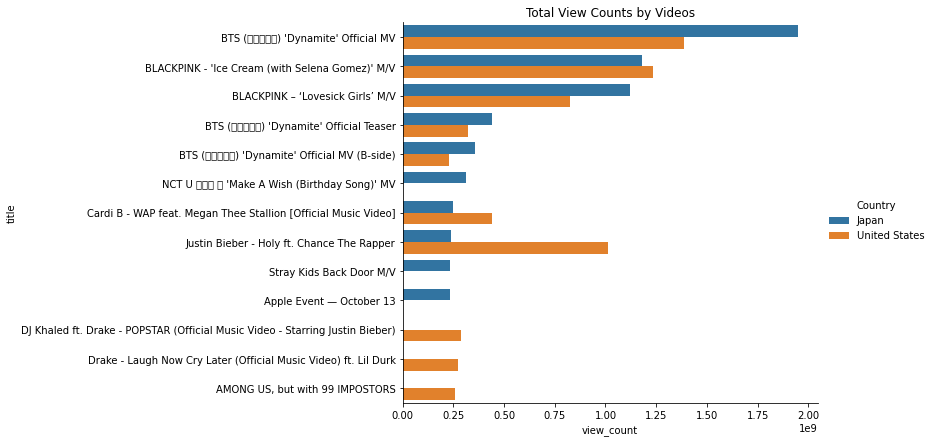

In [163]:
sns.catplot(x="view_count", y="title", hue="Country", kind="bar", data=top_videos_data, height=6, aspect=2)
plt.title('Total View Counts by Videos');


Total Likes by Videos:

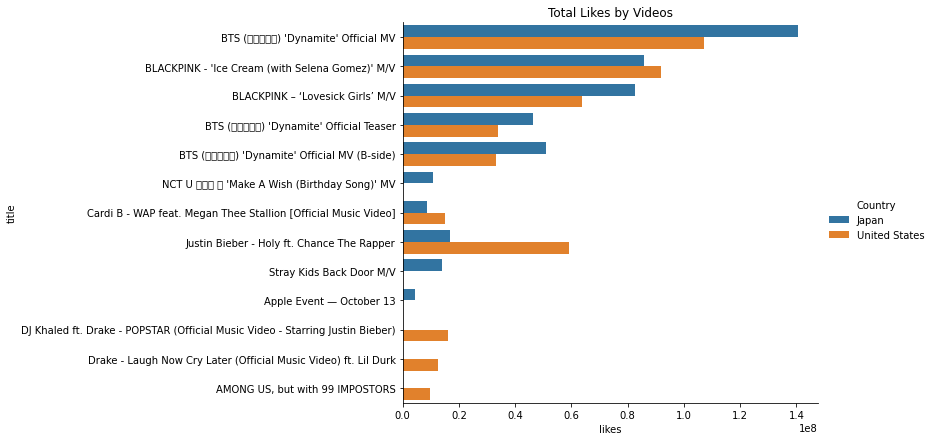

In [160]:
sns.catplot(x="likes", y="title", hue="Country", kind="bar", data=top_videos_data, height=6, aspect=2)
plt.title('Total Likes by Videos');

Total Dislikes by Videos:

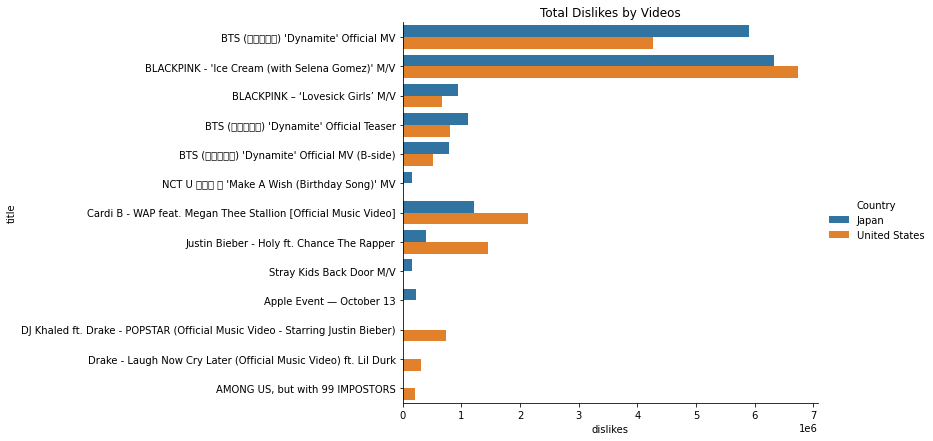

In [161]:
video_view_count_plot=sns.catplot(x="dislikes", y="title", hue="Country", kind="bar", data=top_videos_data, height=6, aspect=2)
plt.title('Total Dislikes by Videos');

It seems that both Japanese and American are the fan of Korea music!